In [1]:
# # create and plot a random series

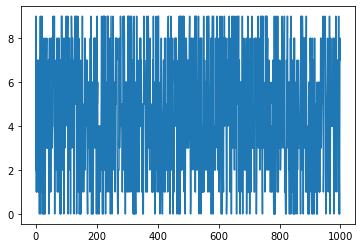

In [2]:
from random import seed
from random import randrange
from matplotlib import pyplot
seed(1)
series = [randrange(10) for i in range(1000)]
pyplot.plot(series)
pyplot.show()

In [3]:
# Running the example plots the sequence of random numbers. It's a real mess. It looks
# nothing like a time series.

In [4]:
# This is not a random walk. It is just a sequence of random numbers also called white noise

In [5]:
# A common mistake that beginners make is to think that a random walk is a
# list of random numbers, and this is not the case at all.

In [6]:
# # create and plot a random walk

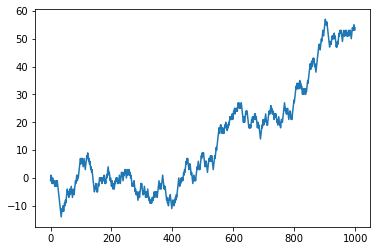

In [7]:
from random import seed
from random import random
from matplotlib import pyplot


seed(1)

random_walk = list()

random_walk.append(-1 if random() < 0.5 else 1)

for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    # adding movement to obs in previous timestep
    value = random_walk[i-1] + movement
    random_walk.append(value)

pyplot.plot(random_walk)
pyplot.show()

In [ ]:
# # plot the autocorrelation of a random walk

In [9]:
from pandas.plotting import autocorrelation_plot

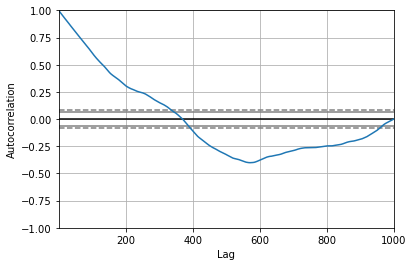

In [10]:

autocorrelation_plot(random_walk)
pyplot.show()

In [ ]:
# calculate the stationarity of a random walk

In [11]:

from statsmodels.tsa.stattools import adfuller

# statistical test
result = adfuller(random_walk)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.341605
p-value: 0.979175
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [ ]:
'''The null hypothesis of the test is that the time series is non-stationary. Running the example,
we can see that the test statistic value was 0.341605. This is larger than all of the critical values
at the 1%, 5%, and 10% confidence levels. Therefore, we can say that the time series does
appear to be non-stationary '''

In [ ]:
# calculate and plot a differenced random walk

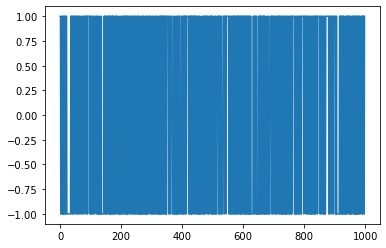

In [12]:
from matplotlib import pyplot

# take difference
diff = list()

for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i - 1]
    diff.append(value)

    
# line plot
pyplot.plot(diff)
pyplot.show()

In [ ]:
# This difference graph also makes it clear that really we have no information to work with
# here other than a series of random moves. There is no structure to learn. Now that the time
# series is stationary, we can recalculate the correlogram of the differenced series. The complete
# example is listed below.

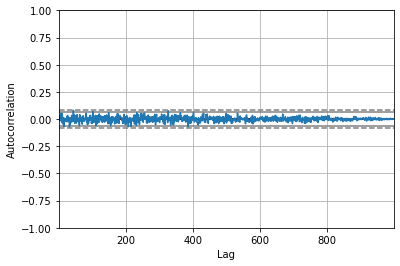

In [13]:
# plot the autocorrelation of a differenced random walk

# line plot
autocorrelation_plot(diff)
pyplot.show()

In [ ]:
# persistence forecasts for a random walk

In [14]:

from sklearn.metrics import mean_squared_error
from math import sqrt

# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]


In [17]:
train

[-1,
 0,
 1,
 0,
 -1,
 -2,
 -1,
 0,
 -1,
 -2,
 -1,
 -2,
 -1,
 -2,
 -3,
 -2,
 -3,
 -2,
 -1,
 -2,
 -3,
 -2,
 -1,
 -2,
 -3,
 -4,
 -5,
 -6,
 -7,
 -8,
 -9,
 -10,
 -11,
 -12,
 -13,
 -14,
 -13,
 -12,
 -11,
 -12,
 -11,
 -10,
 -11,
 -12,
 -11,
 -10,
 -9,
 -10,
 -9,
 -8,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -5,
 -6,
 -5,
 -6,
 -7,
 -6,
 -5,
 -4,
 -5,
 -6,
 -5,
 -4,
 -3,
 -4,
 -5,
 -6,
 -7,
 -6,
 -5,
 -4,
 -5,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -2,
 -1,
 0,
 1,
 0,
 -1,
 0,
 1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 6,
 5,
 6,
 7,
 6,
 7,
 6,
 5,
 4,
 5,
 6,
 7,
 6,
 5,
 4,
 3,
 4,
 5,
 6,
 7,
 8,
 7,
 8,
 9,
 8,
 7,
 6,
 7,
 6,
 5,
 6,
 5,
 4,
 3,
 4,
 3,
 2,
 3,
 2,
 1,
 0,
 -1,
 -2,
 -3,
 -4,
 -5,
 -4,
 -3,
 -4,
 -3,
 -2,
 -3,
 -4,
 -5,
 -4,
 -5,
 -4,
 -3,
 -2,
 -3,
 -2,
 -1,
 0,
 -1,
 0,
 -1,
 0,
 -1,
 0,
 -1,
 -2,
 -1,
 0,
 -1,
 0,
 -1,
 0,
 1,
 0,
 -1,
 -2,
 -1,
 -2,
 -1,
 0,
 1,
 0,
 1,
 2,
 3,
 4,
 3,
 2,
 1,
 2,
 1,
 0,
 -1,
 0,
 -1,
 -2,
 -3,
 -2,
 -1,
 -2,
 -3,
 -4,
 -3,
 -2,
 -3,
 -4,
 -3,
 -2,
 -1,


In [16]:
train[-1]

20

In [18]:
test

[21,
 20,
 21,
 22,
 21,
 20,
 21,
 22,
 21,
 22,
 23,
 22,
 23,
 22,
 21,
 22,
 21,
 20,
 19,
 18,
 19,
 20,
 19,
 18,
 19,
 18,
 17,
 16,
 15,
 14,
 15,
 16,
 17,
 18,
 19,
 18,
 19,
 20,
 21,
 20,
 19,
 20,
 21,
 20,
 21,
 22,
 23,
 22,
 21,
 20,
 19,
 20,
 19,
 20,
 21,
 22,
 23,
 24,
 23,
 24,
 23,
 24,
 25,
 26,
 25,
 24,
 25,
 24,
 23,
 24,
 23,
 24,
 23,
 22,
 21,
 22,
 23,
 22,
 23,
 22,
 23,
 22,
 21,
 20,
 21,
 20,
 19,
 20,
 21,
 22,
 21,
 20,
 19,
 20,
 19,
 18,
 19,
 20,
 21,
 20,
 21,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 26,
 25,
 24,
 25,
 24,
 23,
 24,
 23,
 24,
 25,
 24,
 23,
 22,
 21,
 22,
 23,
 24,
 23,
 24,
 23,
 22,
 21,
 22,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 32,
 33,
 34,
 33,
 32,
 33,
 34,
 33,
 32,
 33,
 34,
 35,
 34,
 33,
 34,
 33,
 32,
 33,
 32,
 31,
 30,
 31,
 32,
 31,
 30,
 31,
 32,
 31,
 32,
 31,
 30,
 31,
 32,
 31,
 32,
 33,
 34,
 35,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 40,
 39,
 40,
 41,
 42,
 41,
 40,


In [19]:
# persistence
predictions = list()

history = train[-1]

for i in range(len(test)):
    yhat = history
    predictions.append(yhat)
    history = test[i]
    
    


In [20]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE: %.3f' % rmse)

Persistence RMSE: 1.000


In [ ]:
'''Running the example estimates the RMSE of the model as 1. This too is expected, given
that we know that the variation from one time step to the next is always going to be 1, either
in the positive or negative direction.'''

In [ ]:
'''Another error that beginners to the random walk make is to assume that if the range of
error (variance) is known, then we can make predictions using a random walk generation type
process. That is, if we know the error is either -1 or 1, then why not make predictions by adding
a randomly selected -1 or 1 to the previous value. We can demonstrate this random prediction
method in Python below.'''

In [ ]:
# random predictions for a random walk

In [21]:

# random prediction
predictions2 = list()
history = train[-1]

for i in range(len(test)):
    yhat = history + (-1 if random() < 0.5 else 1)
    predictions2.append(yhat)
    history = test[i]

    
rmse = sqrt(mean_squared_error(test, predictions2))
print('Random RMSE: %.3f' % rmse)

Random RMSE: 1.328


In [ ]:
# Running the example, we can see that indeed the algorithm results in a worse performance
# than the persistence method, with a RMSE of 1.328.

In [ ]:
# Persistence, or the naive forecast, is the best prediction we can make for a random walk time
# series.